In [1]:
import os
import sys
from glob import glob
from PIL import Image
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import defaultdict
from utils import label_map_util
from utils import visualization_utils as vis_util
import random

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def load_graph(graph_file):
    """Loads a frozen inference graph"""
    graph = tf.Graph()
    with graph.as_default():
        od_graph_def = tf.GraphDef()
        with tf.gfile.GFile(graph_file, 'rb') as fid:
            serialized_graph = fid.read()
            od_graph_def.ParseFromString(serialized_graph)
            tf.import_graph_def(od_graph_def, name='')
    return graph


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape((im_height, im_width, 3)).astype(np.uint8)

In [3]:
## Test model
PATH_TO_GRAPH = r'models/frozen_inference_graph.pb'
# PATH_TO_GRAPH = r'foreign_graph.pb'
PATH_TO_LABELS = r'data/udacity_label_map.pbtxt'
NUM_CLASSES = 13

In [4]:
detection_graph = load_graph(PATH_TO_GRAPH)

In [5]:
label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)
print(category_index)

{1: {'id': 1, 'name': 'Green'}, 2: {'id': 2, 'name': 'Red'}, 3: {'id': 3, 'name': 'Yellow'}, 4: {'id': 4, 'name': 'off'}}


In [6]:
# PATH_TO_IMGS = r'data/dataset_test_rgb/rgb/test/jpeg'
PATH_TO_IMGS = r'data/sim-and-udacity-data/udacity_testarea_rgb'
TEST_IMGS = glob(os.path.join(PATH_TO_IMGS, r'*.jpg'))
IMAGE_SIZE = (12, 8)
random.shuffle(TEST_IMGS)

SCORES
[[5.7553345e-01 3.8580158e-01 1.3927110e-01 1.2209685e-02 1.7169346e-03
  6.4462039e-04 1.5028604e-06 3.5865675e-08 5.7347849e-10 8.2192878e-11]]
CLASSES
[[2. 3. 1. 4. 4. 4. 3. 4. 4. 4.]]


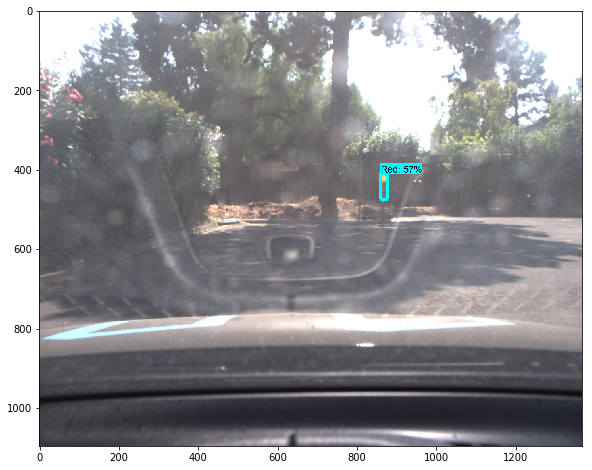

SCORES
[[5.7284021e-01 3.4074554e-01 1.3309842e-01 1.0615268e-02 7.0718713e-03
  5.7395468e-03 8.9883997e-06 2.0839318e-08 3.8349826e-09 5.2333060e-10]]
CLASSES
[[2. 3. 1. 4. 4. 4. 4. 3. 1. 4.]]


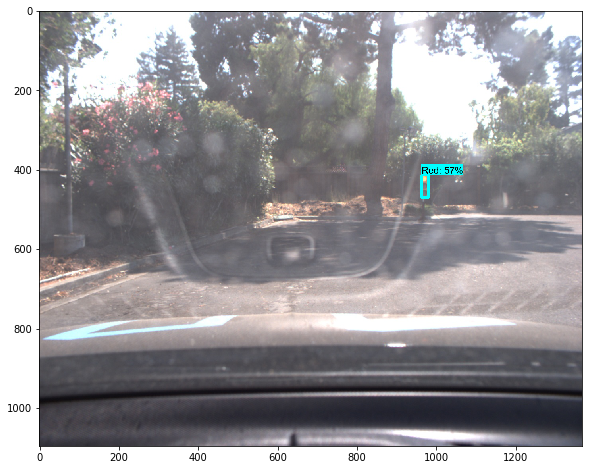

SCORES
[[9.9625671e-01 2.9917000e-02 1.3894570e-02 3.0203178e-03 2.5153928e-03
  1.9272328e-03 9.6993701e-04 8.4422989e-04 7.5303105e-04 4.3955425e-04]]
CLASSES
[[1. 2. 3. 4. 4. 4. 4. 4. 4. 4.]]


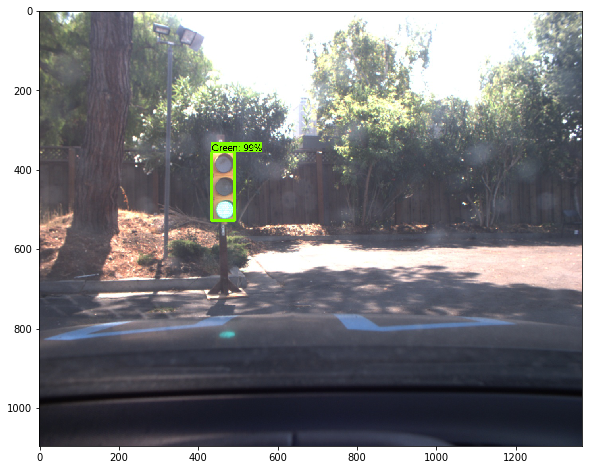

SCORES
[[9.9320799e-01 2.9695660e-02 6.1111674e-03 2.6825606e-03 2.5949928e-03
  2.1149253e-03 7.9956301e-04 3.3046337e-04 3.9047927e-06 3.1037050e-07]]
CLASSES
[[1. 3. 2. 4. 4. 4. 4. 4. 3. 4.]]


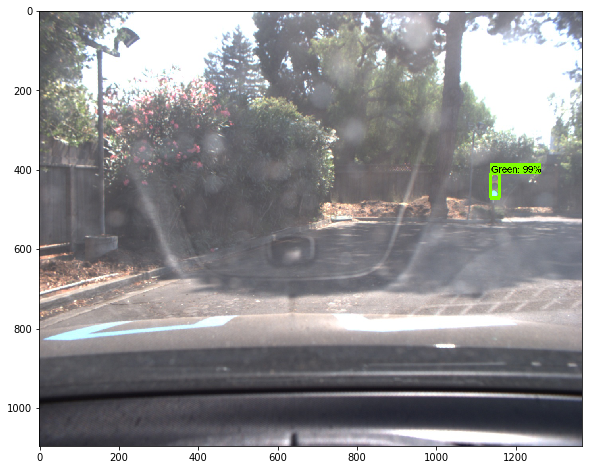

SCORES
[[7.3098409e-01 2.1018317e-01 1.3285278e-01 1.1145020e-02 6.6130385e-03
  5.6927726e-03 5.6940797e-05 2.3963876e-06 2.0238110e-08 3.3879255e-09]]
CLASSES
[[2. 3. 1. 4. 4. 4. 4. 4. 3. 1.]]


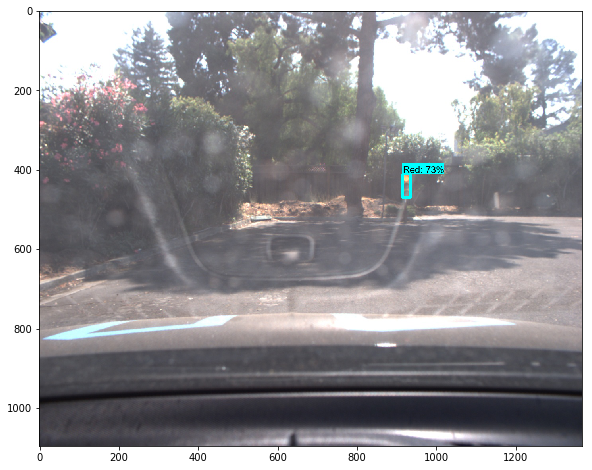

SCORES
[[9.9816269e-01 1.3929056e-02 8.1391707e-03 3.0870868e-03 1.3383544e-03
  9.3649694e-04 6.4645824e-04 3.0417388e-04 3.7012203e-06 6.0491851e-07]]
CLASSES
[[1. 2. 3. 4. 4. 4. 4. 4. 1. 2.]]


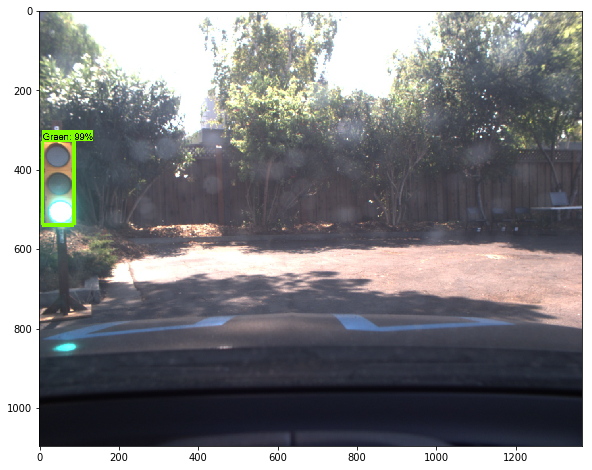

SCORES
[[5.15564263e-01 3.94873381e-01 1.15459144e-01 1.12808542e-02
  7.73685193e-03 6.95093628e-03 2.48607108e-03 8.54006732e-09
  4.46731985e-10 3.78966608e-10]]
CLASSES
[[3. 2. 1. 4. 4. 4. 4. 2. 2. 3.]]


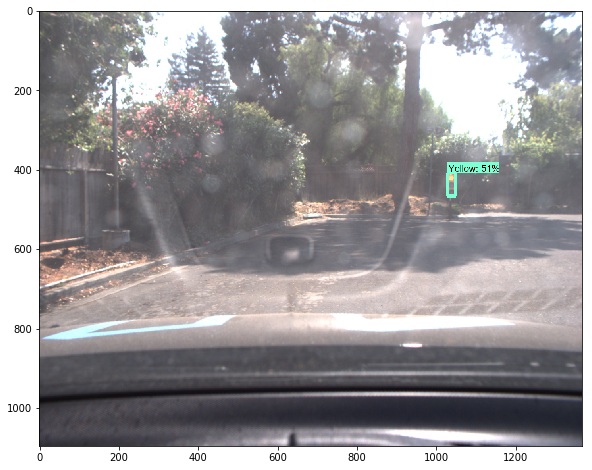

SCORES
[[9.9754697e-01 2.1291539e-02 5.7772235e-03 4.3717097e-03 2.8969452e-03
  2.7195932e-03 7.0369756e-04 3.0316885e-05 2.3412198e-05 2.0920584e-06]]
CLASSES
[[1. 2. 3. 4. 4. 4. 4. 1. 4. 2.]]


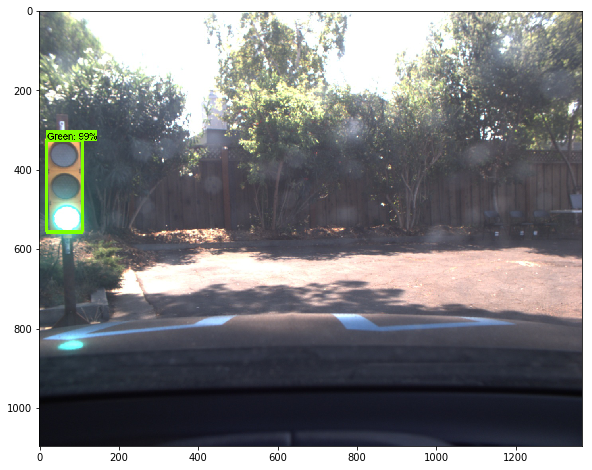

SCORES
[[9.9484020e-01 2.3039641e-02 1.0861582e-02 5.2997377e-03 3.6821289e-03
  3.1059550e-03 2.0476002e-03 9.9081069e-04 8.2031509e-04 4.0495518e-04]]
CLASSES
[[2. 3. 1. 4. 4. 3. 4. 4. 4. 4.]]


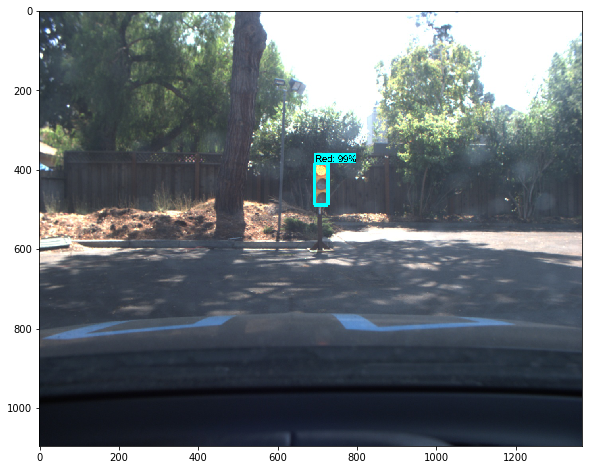

SCORES
[[7.73354948e-01 1.68675527e-01 8.74377936e-02 9.19429772e-03
  6.45120675e-03 8.07600678e-04 2.99312465e-04 1.02790736e-07
  7.19941706e-09 6.01014261e-09]]
CLASSES
[[3. 2. 1. 4. 4. 4. 4. 2. 1. 3.]]


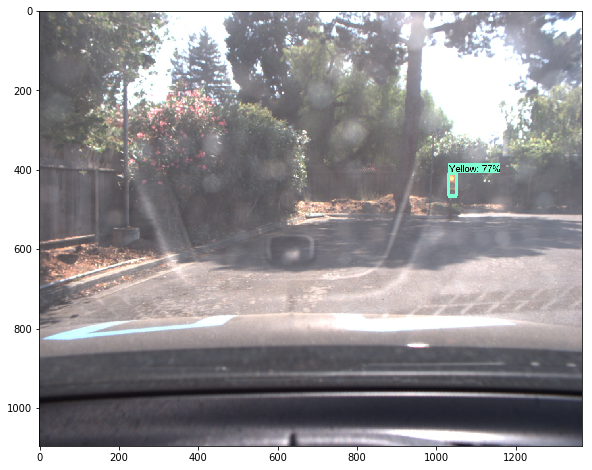

SCORES
[[0.99666697 0.337505   0.02581013 0.01759642 0.00343631 0.00264194
  0.00173052 0.00145677 0.00130932 0.00109055]]
CLASSES
[[1. 1. 3. 2. 1. 2. 3. 4. 4. 4.]]


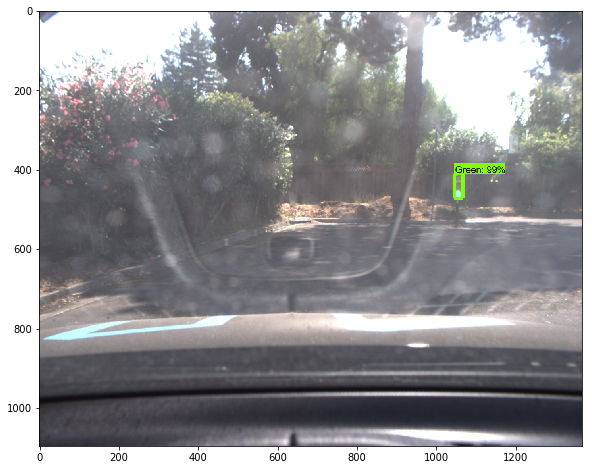

In [7]:
with detection_graph.as_default():
    with tf.Session(graph=detection_graph) as sess:
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        detect_boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        detect_scores = detection_graph.get_tensor_by_name('detection_scores:0')
        detect_classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        
        for idx, img_path in enumerate(TEST_IMGS):
            random.shuffle(TEST_IMGS)
            image = Image.open(img_path)
            image_np = load_image_into_numpy_array(image)
            image_expanded = np.expand_dims(image_np, axis=0)
            
            (boxes, scores, classes, num) = sess.run(
                [detect_boxes, detect_scores, detect_classes, num_detections],
                feed_dict={image_tensor: image_expanded})
            
            print('SCORES')
            print(scores)
            print('CLASSES')
            print(classes)
#             print('BOXES')
#             print(boxes)
#             print('NUM')
#             print(num)
            
            vis_util.visualize_boxes_and_labels_on_image_array(
                image_np, 
                np.squeeze(boxes),
                np.squeeze(classes).astype(np.int32),
                np.squeeze(scores),
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                line_thickness=8)
            plt.figure(figsize=IMAGE_SIZE)
            plt.imshow(image_np)
            plt.show()
            
            if idx == 10:
                break